In [98]:
from google.colab import drive


In [99]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib


In [101]:
data = pd.read_csv('/content/drive/MyDrive/dataset/root2ai.csv')

In [102]:
data.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [103]:
data.shape

(22704, 2)

In [104]:
data.Text

0        reserve bank forming expert committee based in...
1                director could play role financial system
2        preliminary discuss secure transaction study r...
3        security indeed prove essential transforming f...
4        bank settlement normally take three days based...
                               ...                        
22699    fourth study discusses blockchain technology e...
22700    book finishes stating biggest issue emerging F...
22701                                  people culture cess
22702    author challenges execu tive lead change stop ...
22703    change data driven culture come bottom must start
Name: Text, Length: 22704, dtype: object

In [105]:
data.Target

0        Blockchain
1        Blockchain
2        Blockchain
3        Blockchain
4        Blockchain
            ...    
22699      Reg Tech
22700      Reg Tech
22701      Reg Tech
22702      Reg Tech
22703      Reg Tech
Name: Target, Length: 22704, dtype: object

In [106]:
num_rows = data.shape[0]
print(num_rows)

22704


In [107]:
num_cols = data.shape[1]
print(num_cols)

2


In [108]:
X = data.Text
Y = data.Target

In [109]:
X.shape

(22704,)

In [110]:
Y.shape

(22704,)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22704 entries, 0 to 22703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    22701 non-null  object
 1   Target  22704 non-null  object
dtypes: object(2)
memory usage: 354.9+ KB


In [112]:
data.nunique()

Text      20986
Target       11
dtype: int64

In [113]:
data.isnull().values.any()

True

In [114]:
data.isnull().sum().sum()

3

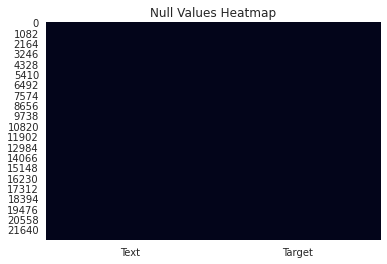

In [115]:
sns.heatmap(data.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [116]:
data.isnull().sum()

Text      3
Target    0
dtype: int64

In [117]:
data.isnull().any()

Text       True
Target    False
dtype: bool

In [118]:
#data = data.drop('Text', 1) //To Drop the whole column of dataset

In [119]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [120]:
input_cols = list(data.columns.values)
input_cols.remove('Target')
print(input_cols)

['Text']


In [121]:
categorical_cols = data.select_dtypes('object').columns.to_list()
print(categorical_cols)

['Text', 'Target']


In [122]:
output_cols = [data.columns[1]]
print(output_cols)

['Target']


In [123]:
##  input_cols = Text   &   Output_cols = Target

**Prepare the dataset for training**

In [124]:
def data_to_arrays(data):
    # Make a copy of the original dataframe
    dataframe1 = data.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [125]:
inputs_array, targets_array = data_to_arrays(data)
inputs_array, targets_array

(array([[15143],
        [ 6575],
        [14019],
        ...,
        [13603],
        [ 3257],
        [ 4465]], dtype=int16), array([[1],
        [1],
        [1],
        ...,
        [7],
        [7],
        [7]], dtype=int8))

In [126]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.nn as nn
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [127]:
inputs = torch.from_numpy(inputs_array).type(torch.float32)
print(inputs)

targets = torch.from_numpy(targets_array).type(torch.float32)
print(targets)

tensor([[15143.],
        [ 6575.],
        [14019.],
        ...,
        [13603.],
        [ 3257.],
        [ 4465.]])
tensor([[1.],
        [1.],
        [1.],
        ...,
        [7.],
        [7.],
        [7.]])


In [128]:
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

In [129]:
dataset = TensorDataset(inputs, targets)

In [130]:
val_percent = 0.17                      # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size]) 


In [131]:
batch_size = 77

In [132]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [133]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[15518.],
        [19526.],
        [12519.],
        [ 7518.],
        [  165.],
        [ 6799.],
        [17235.],
        [ 4775.],
        [ 5066.],
        [18359.],
        [ 6558.],
        [11706.],
        [ 9714.],
        [ 1283.],
        [19983.],
        [17126.],
        [16342.],
        [13572.],
        [ 4867.],
        [13102.],
        [19884.],
        [13897.],
        [13758.],
        [  513.],
        [ 7390.],
        [ 6485.],
        [ 7101.],
        [ 2232.],
        [ 4691.],
        [10949.],
        [ 4859.],
        [18677.],
        [ 4018.],
        [17554.],
        [10678.],
        [ 9573.],
        [13229.],
        [ 9763.],
        [11931.],
        [20748.],
        [ 7832.],
        [20066.],
        [ 2842.],
        [11667.],
        [ 3928.],
        [20876.],
        [ 6426.],
        [ 7634.],
        [10472.],
        [ 6809.],
        [ 5706.],
        [ 7421.],
        [20492.],
        [ 5921.],
        [ 4676.],
  

**Create a Linear Regression**

In [134]:
input_size = len(input_cols)
print(input_size)

output_size = len(output_cols)
print(output_size)

input_size,output_size

1
1


(1, 1)

In [135]:
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)      # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                                 # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.smooth_l1_loss(out, targets)                 # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.smooth_l1_loss(out, targets)                # fill this    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [136]:
model = InsuranceModel()

In [137]:
list(model.parameters())

[Parameter containing:
 tensor([[0.4062]], requires_grad=True), Parameter containing:
 tensor([-0.2939], requires_grad=True)]

**Train the model to fit the**

In [138]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [139]:
result = evaluate(model, val_loader) # Use the the evaluate function
print(result)

{'val_loss': 4227.95458984375}


In [140]:
epochs = 500
lr = 1e-5
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 939.5521
Epoch [40], val_loss: 262.0019
Epoch [60], val_loss: 305.2441
Epoch [80], val_loss: 813.5555
Epoch [100], val_loss: 1113.0909
Epoch [120], val_loss: 1179.0167
Epoch [140], val_loss: 257.7660
Epoch [160], val_loss: 994.1439
Epoch [180], val_loss: 489.8466
Epoch [200], val_loss: 836.9314
Epoch [220], val_loss: 874.9063
Epoch [240], val_loss: 120.7132
Epoch [260], val_loss: 481.1763
Epoch [280], val_loss: 1152.6600
Epoch [300], val_loss: 770.4340
Epoch [320], val_loss: 688.1262
Epoch [340], val_loss: 538.5106
Epoch [360], val_loss: 899.7886
Epoch [380], val_loss: 863.2620
Epoch [400], val_loss: 595.8823
Epoch [420], val_loss: 675.8407
Epoch [440], val_loss: 82.6953
Epoch [460], val_loss: 315.4653
Epoch [480], val_loss: 172.8700
Epoch [500], val_loss: 297.2729


In [141]:
epochs = 400
lr = 1e-6
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 64.4841
Epoch [40], val_loss: 2.5388
Epoch [60], val_loss: 67.0068
Epoch [80], val_loss: 48.4804
Epoch [100], val_loss: 92.3848
Epoch [120], val_loss: 3.8264
Epoch [140], val_loss: 71.5084
Epoch [160], val_loss: 36.0599
Epoch [180], val_loss: 39.9007
Epoch [200], val_loss: 30.0296
Epoch [220], val_loss: 36.8200
Epoch [240], val_loss: 66.6297
Epoch [260], val_loss: 47.7301
Epoch [280], val_loss: 48.2811
Epoch [300], val_loss: 46.2115
Epoch [320], val_loss: 41.0419
Epoch [340], val_loss: 98.6793
Epoch [360], val_loss: 53.9997
Epoch [380], val_loss: 51.4336
Epoch [400], val_loss: 41.4321


In [142]:
epochs = 700
lr = 1e-2
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 452810.0938
Epoch [40], val_loss: 277500.4062
Epoch [60], val_loss: 411404.1875
Epoch [80], val_loss: 738247.3750
Epoch [100], val_loss: 597202.2500
Epoch [120], val_loss: 632125.0000
Epoch [140], val_loss: 156670.9531
Epoch [160], val_loss: 787325.9375
Epoch [180], val_loss: 700656.5000
Epoch [200], val_loss: 921732.2500
Epoch [220], val_loss: 558130.6250
Epoch [240], val_loss: 439503.9062
Epoch [260], val_loss: 228249.5625
Epoch [280], val_loss: 706268.8750
Epoch [300], val_loss: 664565.6250
Epoch [320], val_loss: 758613.2500
Epoch [340], val_loss: 646161.0625
Epoch [360], val_loss: 518641.9688
Epoch [380], val_loss: 1059828.3750
Epoch [400], val_loss: 442308.3438
Epoch [420], val_loss: 160150.8438
Epoch [440], val_loss: 534436.6250
Epoch [460], val_loss: 1001479.1875
Epoch [480], val_loss: 904009.8125
Epoch [500], val_loss: 70768.9297
Epoch [520], val_loss: 255111.8281
Epoch [540], val_loss: 433632.9375
Epoch [560], val_loss: 618147.0625
Epoch [580], val_loss: 

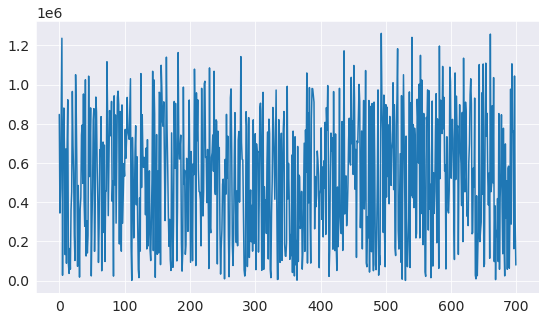

In [143]:
loss = []
for value in history4:
#     print(value)
    loss.append(value['val_loss'])
plt.plot(loss)

In [144]:
val_loss = 8376.0850

print(val_loss)

8376.085


**Make predictions using the trained**

In [145]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)                # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [146]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([9162.])
Target: tensor([4.])
Prediction: tensor([-69925.2891])


In [147]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([18553.])
Target: tensor([10.])
Prediction: tensor([-141597.9062])


In [148]:
input, target = val_ds[23]
predict_single(input, target, model)

Input: tensor([14072.])
Target: tensor([4.])
Prediction: tensor([-107398.6719])
